#Dependencies


In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.datasets import make_blobs

#Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return (np.dot(x, self.w.T) + self.b)
  
  def sigmoid(self, x):
    return 1/(1+np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) 
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    
    if y == 1:
      return y * y_pred * x
    
    elif y == 0:
      return -1 * (1 - y_pred) * x
    
    else:
      raise ValueError('y should be 0 or 1')

  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    
    if y == 1:
      return (y * y_pred) 
    
    elif y == 0:
      return  -1 * (1 - y_pred)
    
    else:
      raise ValueError('y should be 0 or 1')
  
  def fit(self, x, y, epochs = 1, learning_rate = 0.5, initialise = True, display_loss = True, loss_func = 'mse'):
    
    if initialise:
      self.w = np.random.randn(1, x.shape[1])
      self.b = 1
      
    if display_loss:
      loss = {}
      
    for i in tqdm_notebook(range(epochs), unit = "epoch", total = epochs):
      
      dw, db = 0, 0
      
      for s, t in zip(x, y):
        if loss_func == 'mse':
          dw += self.grad_w_mse(s, t)
          db += self.grad_b_mse(s, t)
          
        if loss_func == 'ce':
          dw += self.grad_w_ce(s, t)
          db += self.grad_b_ce(s, t)
          
      m = x.shape[0]
      self.w -= (learning_rate * dw)/m  
      self.b -= (learning_rate * db)/m
      
      if display_loss:
        y_pred = self.sigmoid(self.perceptron(x))
        
        if loss_func == 'mse':
          loss[i] = mean_squared_error(y_pred, y)
        elif loss_func == 'ce':
          loss[i] = log_loss(y, y_pred)
          
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_func == 'mse':
        plt.ylabel('MSE')
      
      elif loss_func == 'ce':
        plt.ylabel('CE')
        
      plt.show()
  
  def predict(self, x):
    y_pred  = []
    
    for a in x:
      b = self.sigmoid(self.perceptron(a))
      y_pred.append(b)
      
    return (np.array(y_pred)).ravel()
    

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red", "yellow", "green"])

In [5]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


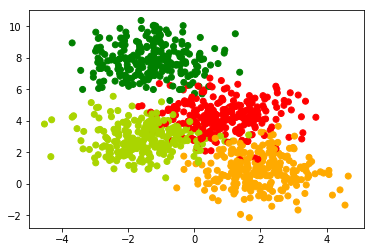

In [6]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [0]:
#making the data-set a binary classifiable
labels_orig = labels
labels = np.mod(labels_orig, 2)

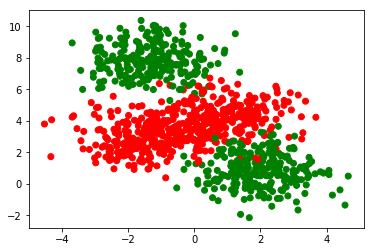

In [8]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = my_cmap)
plt.show()

In [9]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(750, 2) (250, 2) (750,) (250,)


In [0]:
sn = SigmoidNeuron()

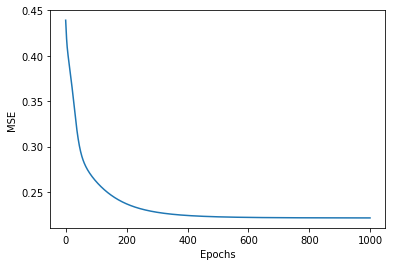

In [11]:
sn.fit(x_train, y_train, epochs = 1000, learning_rate = 0.3, display_loss = True)

In [12]:
y_pred_train = sn.predict(x_train)
y_pred_binarised_train = (y_pred_train >= 0.5).astype('int')
y_pred_val = sn.predict(x_val)
y_pred_binarised_val = (y_pred_val >= 0.5).astype('int')
accuracy_train = accuracy_score(y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(y_pred_binarised_val, y_val)

print('Training Accuracy: ', round(accuracy_train, 2))
print('Validation Accuracy: ', round(accuracy_val, 2))


Training Accuracy:  0.65
Validation Accuracy:  0.58


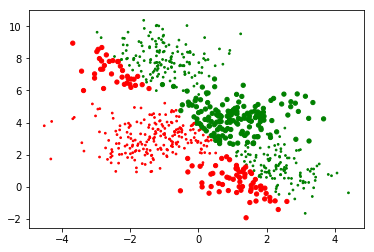

In [13]:
#plot for train set
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_pred_binarised_train , cmap = my_cmap, s = 15*(np.abs(y_pred_binarised_train - y_train) + 0.2))
plt.show()

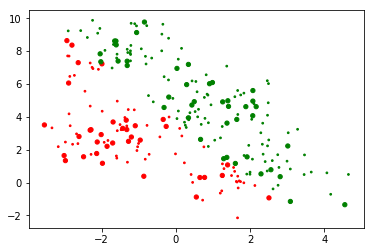

In [14]:
#plot for validation set
plt.scatter(x_val[:, 0], x_val[:, 1], c = y_pred_binarised_val , cmap = my_cmap, s = 15*(np.abs(y_pred_binarised_train - y_train) + 0.2))
plt.show()

In [0]:
sn1 = SigmoidNeuron()

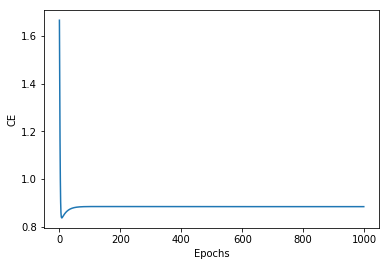

In [44]:
sn1.fit(x_train, y_train, epochs = 1000, learning_rate = 0.1, display_loss = True, loss_func = 'ce')

In [45]:
y_pred_train = sn1.predict(x_train)
y_pred_binarised_train = (y_pred_train >= 0.5).astype('int')
y_pred_val = sn1.predict(x_val)
y_pred_binarised_val = (y_pred_val >= 0.5).astype('int')
accuracy_train = accuracy_score(y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(y_pred_binarised_val, y_val)

print('Training Accuracy: ', round(accuracy_train, 2))
print('Validation Accuracy: ', round(accuracy_val, 2))


Training Accuracy:  0.36
Validation Accuracy:  0.43
